In [2]:
# IMPORTING BASIC LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# LOADING THE CEMENTSALES DATA
df = pd.read_excel("DataFinal.xlsx")

# Data Preparation and EDA

In [4]:
df.head(10)    # Top Ten Rows

,Product,Date,Day,FY,Orders_Placed(Qty),NetSales(Qty),Net_SalesPerYear(Cr)
0,Ambuja Cement,2019-04-01,Monday,19 Q2,61,59,26799.0
1,Ambuja Cement,2019-04-02,Tuesday,19 Q2,78,67,NaN
2,Ambuja Cement,2019-04-03,Wednesday,19 Q2,80,67,NaN
3,Ambuja Cement,2019-04-04,Thursday,19 Q2,69,58,NaN
4,Ambuja Cement,2019-04-05,Friday,19 Q2,68,60,NaN
5,Ambuja Cement,2019-04-06,Saturday,19 Q2,73,59,NaN
6,Ambuja Cement,2019-04-08,Monday,19 Q2,77,70,NaN
7,Ambuja Cement,2019-04-09,Tuesday,19 Q2,69,58,NaN
8,Ambuja Cement,2019-04-10,Wednesday,19 Q2,70,61,NaN
9,Ambuja Cement,2019-04-11,Thursday,19 Q2,77,67,NaN


In [5]:
df.tail(5)    # Bottom Ten Rows

,Product,Date,Day,FY,Orders_Placed(Qty),NetSales(Qty),Net_SalesPerYear(Cr)
1144,Ambuja Cement,2022-11-25,Friday,22 Q4,139,124,NaN
1145,Ambuja Cement,2022-11-26,Saturday,22 Q4,125,125,NaN
1146,Ambuja Cement,2022-11-28,Monday,22 Q4,145,134,NaN
1147,Ambuja Cement,2022-11-29,Tuesday,22 Q4,123,115,NaN
1148,Ambuja Cement,2022-11-30,Wednesday,22 Q4,127,114,NaN


In [4]:
df.info()     # BAsic Info Of Dataset like Names, Null-Values And Data Type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149 entries, 0 to 1148
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product               1149 non-null   object        
 1   Date                  1149 non-null   datetime64[ns]
 2   Day                   1149 non-null   object        
 3   FY                    1149 non-null   object        
 4   Orders_Placed(Qty)    1149 non-null   int64         
 5   NetSales(Qty)         1149 non-null   int64         
 6   Net_SalesPerYear(Cr)  4 non-null      float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 63.0+ KB


In [6]:
# lets Check for Missing Values
df.isna().sum()


Product                    0
Date                       0
Day                        0
FY                         0
Orders_Placed(Qty)         0
NetSales(Qty)              0
Net_SalesPerYear(Cr)    1145
dtype: int64

In [7]:
df = df.drop(columns="Net_SalesPerYear(Cr)", axis=1)    # Dropping The Column of Null Values

In [8]:
df.describe()       # EDA / Analytical Description Of Data stating mean,Std Deviation, minimun,maximum, Quartile ranges etc

,Orders_Placed(Qty),NetSales(Qty)
count,1149.000000,1149.000000
mean,85.678851,78.127937
std,21.370966,20.554173
min,40.000000,39.000000
25%,70.000000,63.000000
50%,85.000000,76.000000
75%,101.000000,93.000000
max,148.000000,134.000000


In [9]:
#Lets Check For Duplicate values if any
df.duplicated().sum()    #No Duplicate Values

0

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NetSales(Qty)', ylabel='Density'>

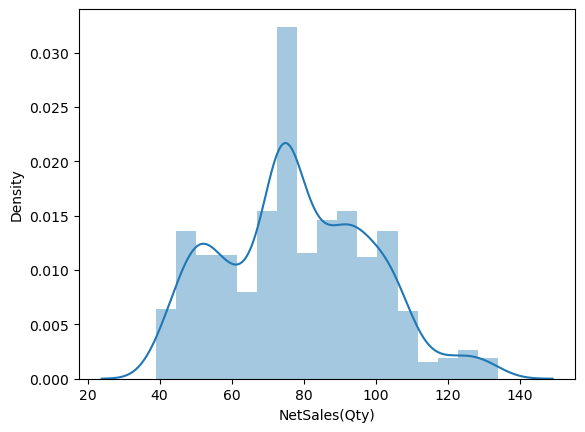

In [10]:
#  Lets Check For Sales distribution /Univariate Analysis
sns.distplot(df['NetSales(Qty)'])                         

#Data Is Right Skewed data/Positively Skewed data

(array([ 85., 145., 110., 250., 158., 161., 140.,  50.,  24.,  26.]),
 array([ 39. ,  48.5,  58. ,  67.5,  77. ,  86.5,  96. , 105.5, 115. ,
        124.5, 134. ]),
 <BarContainer object of 10 artists>)

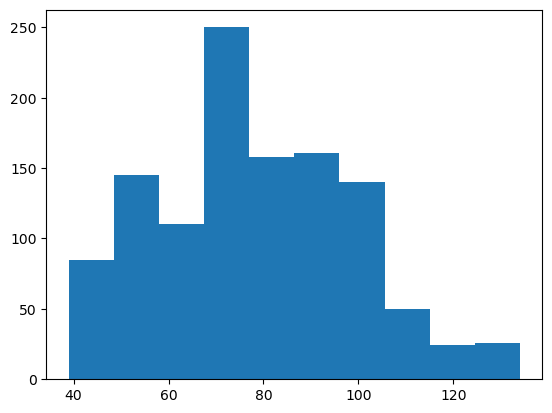

In [11]:
#Univariate Analysis

#Histogram for Sales data
plt.hist(df['NetSales(Qty)'])

# Positive Skewed data  having Maximum Number of Sales lies in Between 70 to 100

(array([ 47., 129., 129., 237., 204., 164., 147.,  53.,  24.,  15.]),
 array([ 40. ,  50.8,  61.6,  72.4,  83.2,  94. , 104.8, 115.6, 126.4,
        137.2, 148. ]),
 <BarContainer object of 10 artists>)

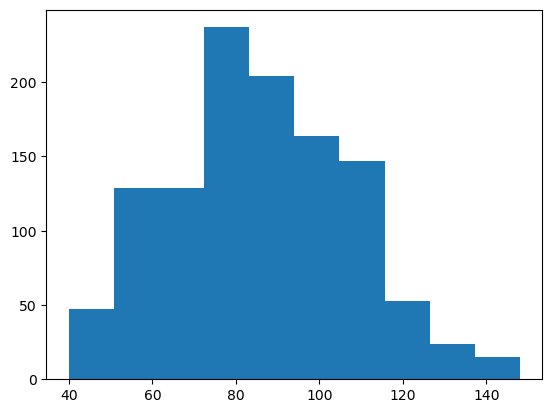

In [14]:
# Histogram For Demands Data
plt.hist(df["Orders_Placed(Qty)"])

# Positively Skewed data having Demands are more in range 75 to 115

{'whiskers': [<matplotlib.lines.Line2D at 0x19b77176ac0>,
 'caps': [<matplotlib.lines.Line2D at 0x19b771840a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b77176910>],
 'medians': [<matplotlib.lines.Line2D at 0x19b77184640>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b77184910>],
 'means': []}

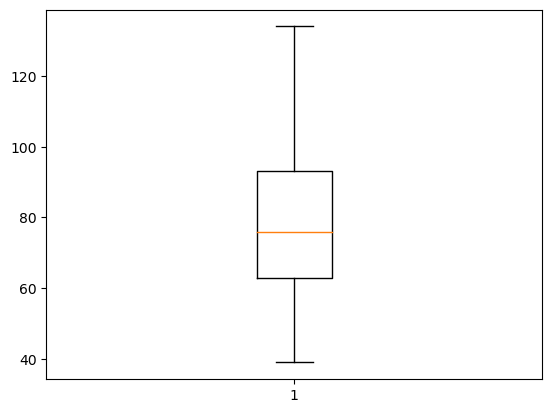

In [12]:
# Boxplot

plt.boxplot(df['NetSales(Qty)'])            # No Outliers Present In the Data

###### No outliers Present In the Data

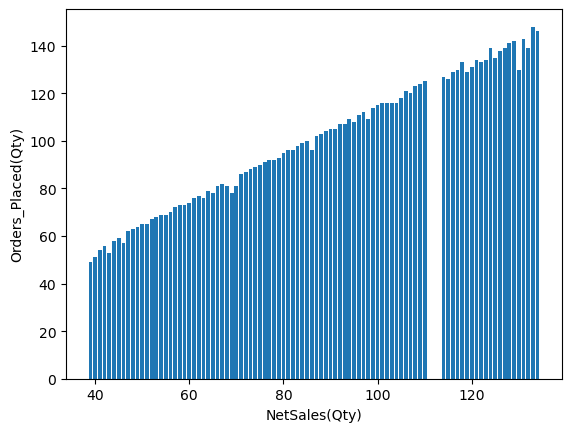

In [13]:
# Bivariate Analysis 
#BARplot
plt.bar(x=df["NetSales(Qty)"], height=df["Orders_Placed(Qty)"]),
plt.xlabel("NetSales(Qty)"),
plt.ylabel("Orders_Placed(Qty)")
plt.show()                           

#Demands And Sales are Directly Proportional to each Other , As Demands increases sales also Increases.

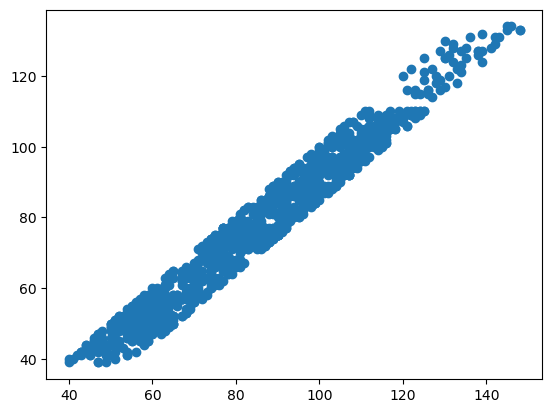

In [15]:
# Scatter plot
plt.scatter(df["Orders_Placed(Qty)"], df["NetSales(Qty)"])

# Data points are densly Placed to each other and linearly Increasing in nature. can draw a Straight Linear Line

In [6]:
# correlation
np.corrcoef(df['Orders_Placed(Qty)'], df['NetSales(Qty)'])     # High Correlation Coefficient = 0.9768

array([[1.        , 0.97685146],
       [0.97685146, 1.        ]])

In [7]:
# Covariance

df.cov()                       

,Orders_Placed(Qty),NetSales(Qty),Net_SalesPerYear(Cr)
Orders_Placed(Qty),456.718202,429.094259,-9.050500e+03
NetSales(Qty),429.094259,422.474036,-1.830292e+04
Net_SalesPerYear(Cr),-9050.500000,-18302.916667,6.854058e+06


In [16]:
df = df.set_index("Date")

In [17]:
Dfs = df.iloc[:,4]

In [18]:
Dfs.head(5)

Date
2019-04-01    59
2019-04-02    67
2019-04-03    67
2019-04-04    58
2019-04-05    60
Name: NetSales(Qty), dtype: int64

In [19]:
#For Demands data
Dfd = df.iloc[:,3]

In [20]:
Dfd.head(5)

Date
2019-04-01    61
2019-04-02    78
2019-04-03    80
2019-04-04    69
2019-04-05    68
Name: Orders_Placed(Qty), dtype: int64

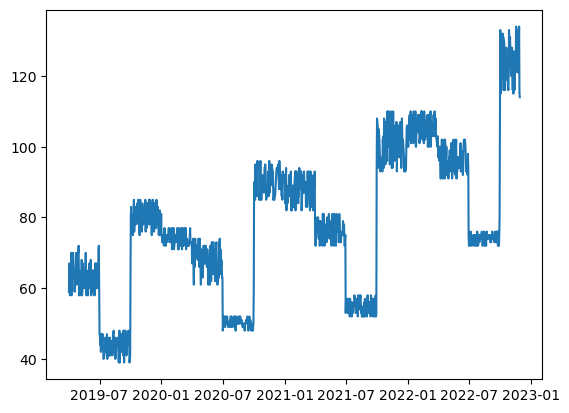

In [21]:
# Visualization of Sales Data
plt.plot(Dfs)

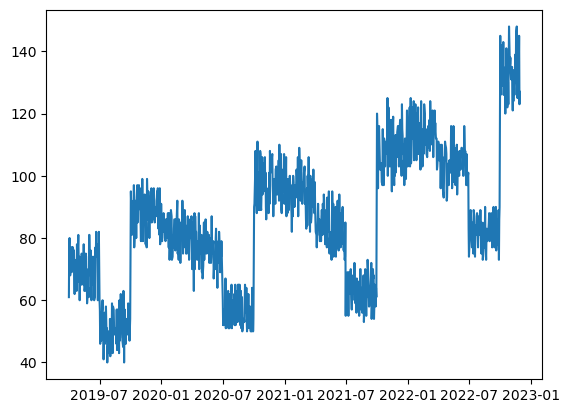

In [22]:
# Visualization of Demands Data
plt.plot(Dfd)